In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(''))))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from utils.data_extract_utils import get_home_credit_data, extract_zip, extract_features_from_installments_payments, EXTRACTRED_BUREAU_COLUMNS

In [2]:
# Download, and extract data from dropbox into memory. 
data = get_home_credit_data()
print(data.keys())

dict_keys(['application_test', 'application_train', 'bureau_balance', 'bureau', 'credit_card_balance', 'installments_payments', 'POS_CASH_balance', 'previous_application'])


In [3]:
installments_payments_df = data['installments_payments']
display(installments_payments_df.head())

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [4]:
display(installments_payments_df.info(null_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None

All values are present, no need to fill anything

In [5]:
display(installments_payments_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.00000,13605401.00000,13605401.00000,13605401.00000,13605401.00000,13602496.00000,13605401.00000,13602496.00000
mean,1903364.96955,278444.88174,0.85664,18.87090,-1042.26999,-1051.11368,17050.90699,17238.22325
std,536202.90555,102718.31041,1.03522,26.66407,800.94628,800.58588,50570.25443,54735.78398
min,1000001.00000,100001.00000,0.00000,1.00000,-2922.00000,-4921.00000,0.00000,0.00000
25%,1434191.00000,189639.00000,0.00000,4.00000,-1654.00000,-1662.00000,4226.08500,3398.26500
50%,1896520.00000,278685.00000,1.00000,8.00000,-818.00000,-827.00000,8884.08000,8125.51500
75%,2369094.00000,367530.00000,1.00000,19.00000,-361.00000,-370.00000,16710.21000,16108.42500
max,2843499.00000,456255.00000,178.00000,277.00000,-1.00000,-1.00000,3771487.84500,3771487.84500


In [6]:
miss_payments = installments_payments_df[installments_payments_df['AMT_PAYMENT'] == 0]
display(miss_payments)
len(miss_payments)/len(installments_payments_df) # very few rows with missing payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
9171,1514613,197031,0.0,10,-2165.0,-2191.0,4500.0,0.0
27338,2769227,126104,0.0,10,-2311.0,-2304.0,7875.0,0.0
39555,1685553,110052,0.0,9,-2434.0,-2462.0,9000.0,0.0
51978,1522932,153001,0.0,21,-2479.0,-2509.0,9000.0,0.0
52839,2254262,197304,0.0,17,-2331.0,-2358.0,9000.0,0.0
...,...,...,...,...,...,...,...,...
13570793,1798118,455496,0.0,2,-2193.0,-2217.0,9000.0,0.0
13575001,1830046,451122,0.0,9,-2221.0,-2229.0,4500.0,0.0
13589240,1822995,448333,0.0,22,-2283.0,-2305.0,9000.0,0.0
13603550,2283151,414728,0.0,12,-2131.0,-2158.0,9000.0,0.0


0.00010584032032572946

<AxesSubplot:>

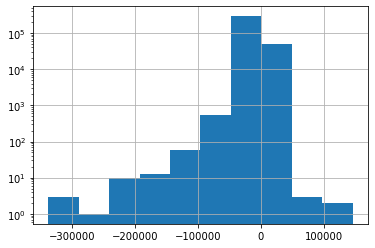

In [7]:
def mis_instalment_payment(x):
    return np.mean(x['AMT_INSTALMENT'].values - x['AMT_PAYMENT'].values)

# Let's create mis_instalment_payment attributes
mis_instalment_payment = installments_payments_df.groupby('SK_ID_CURR').apply(mis_instalment_payment)
mis_instalment_payment_df = pd.DataFrame(mis_instalment_payment, columns=['MIS_INSTALMENT_PAYMENTS'])
mis_instalment_payment_df.fillna(value=0, inplace=True)
mis_instalment_payment_df['MIS_INSTALMENT_PAYMENTS'].hist(log=True)

Seems abouit right, most of the distribution is below zero (which means payments where made on time), with a few that are above zero, meaning instalment_payments werent paid in full.
Let's merge this data with application and see if there's  difference in distribution between target 1,0

In [8]:
display(mis_instalment_payment_df.head())

,MIS_INSTALMENT_PAYMENTS
SK_ID_CURR,
100001,0.0
100002,0.0
100003,0.0
100004,0.0
100005,0.0


In [9]:
application_df = data['application_train'].set_index('SK_ID_CURR')
print(len(mis_instalment_payment_df))
print(len(data['application_train']))

339587
307511


In [10]:
application_with_mis_install = pd.concat([application_df, mis_instalment_payment_df], axis=1)

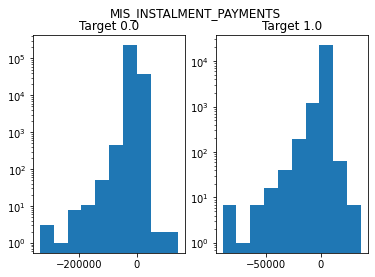

In [11]:
for column in ['MIS_INSTALMENT_PAYMENTS']:
    fig, ax = plt.subplots(1, 2)
    index = 0
    for key, group in application_with_mis_install[['TARGET', column]].groupby('TARGET'):
        ax[index].hist(group[column], label = key, log = True)
        fig.suptitle(column)
        ax[index].title.set_text('Target {}'.format(key))
        index += 1
    plt.show()

You can clearly see a slight difference in distribution between the targets that had missing instalment payments versus those that didn't. This should be a userful feature for training.

array([[<AxesSubplot:title={'center':'MIS_INSTALMENT_PAYMENTS'}>]],
      dtype=object)

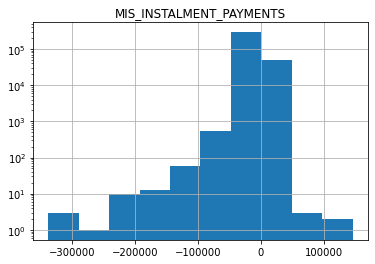

In [12]:
# Test utility method
extracted_df = extract_features_from_installments_payments(data['installments_payments'])
extracted_df.hist(log = True)